In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import analysis_utils as simutils
import scipy.optimize as so
import matplotlib.colors as colors

In [2]:
simdf=pd.read_csv('simulation.csv.zip',index_col=0)

In [3]:
simdf.head()

,x,ch1,ch2
0,0.00000,1,1
1,0.00005,2,1
2,0.00010,4,3
3,0.00015,7,6
4,0.00020,4,7


In [4]:
avgint1=simdf['ch1'].mean()
nbbright1=simutils.var(simdf['ch1'])/avgint1-1
nbnum1=avgint1/nbbright1
avgint2=simdf['ch2'].mean()
nbbright2=simutils.var(simdf['ch2'])/avgint2-1
nbnum2=avgint2/nbbright2
avgintcc=np.sqrt(simdf['ch1'].mean()*simdf['ch2'].mean())
nbbrightcc=simutils.covar(simdf['ch1'],simdf['ch2'])/avgintcc
nbnumcc=avgintcc/nbbrightcc
gval=0.3536
print('channel1:','intensity',avgint1,'brightness',nbbright1/gval,'number',nbnum1*gval)
print('channel2:','intensity',avgint2,'brightness',nbbright2/gval,'number',nbnum2*gval)
print('crosscorr:','brightness',nbbrightcc/gval,'number',nbnumcc*gval)

channel1: intensity 2.8990554809570312 brightness 4.860742025216155 number 0.5964224116230714
channel2: intensity 1.3904190063476562 brightness 4.773779370334652 number 0.29126168146522136
crosscorr: brightness 3.271067023082959 number 0.6137784957631637


In [5]:
simutils.pch2dsizes=[24,24] #this is important to tell the fitting class our dimensions
pch2d,xvals,yvals=np.histogram2d(simdf['ch1'],simdf['ch2'],bins=[np.arange(25),np.arange(25)])
normpch2d=pch2d.astype(float)
totint=normpch2d.sum()
normpch2d/=totint
xvals=xvals[:-1]
yvals=yvals[:-1]

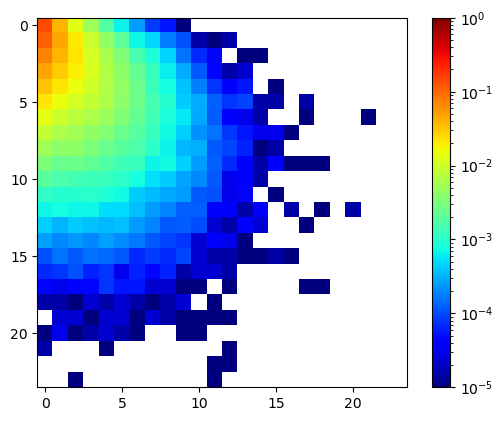

In [6]:
plt.imshow(normpch2d, norm=colors.LogNorm(vmin=0.00001, vmax=1.0), cmap='jet')
plt.colorbar()
plt.show()

In [7]:
gparams=[0.01, 0.01, 3.73510993, 1.48320812, 0.70011231,0.0,2.0,0.5]

In [8]:
fitxvals=np.arange(np.prod(pch2d.shape))
pchsim=simutils.pchfunc2d(fitxvals,*gparams).reshape(pch2d.shape)

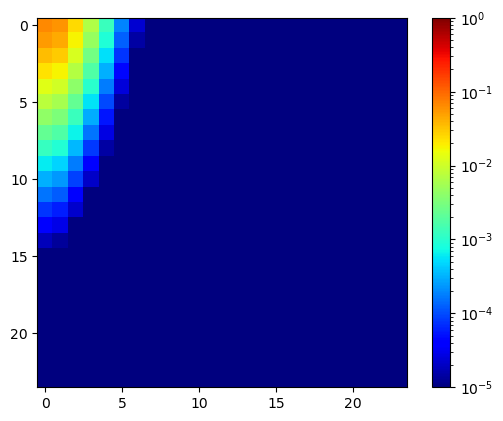

In [9]:
plt.imshow(pchsim, norm=colors.LogNorm(vmin=0.00001, vmax=1.0), cmap='jet')
plt.colorbar()
plt.show()

In [10]:
weights=simutils.getpchweights(pch2d.flatten())

In [11]:
guessparams=[0.0,0.0,2.0,2.0,0.6,0.0,2.0,0.5]
ulims=[0.01,0.01,10.0,10.0,5.0,10.0,10.0,5.0]
llims=[0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.1]

In [12]:
fparams,fcov=so.curve_fit(simutils.pchfunc2d,fitxvals,normpch2d.flatten(),
             p0=guessparams,sigma=1.0/weights,bounds=(llims,ulims),method='trf')
print(fparams)
fit=simutils.pchfunc(fitxvals,*fparams).reshape(normpch2d.shape)

[1.00000000e-02 1.00000000e-02 4.06256867e+00 1.00000000e-01
 5.21102586e-01 1.88396339e-11 6.00253761e+00 2.29640960e-01]


/Users/jru/Documents/IPython_Notebooks/pysimfcs/analysis_utils.py:164: RuntimeWarning: invalid value encountered in scalar divide
  return integral*(2.0**1.5)/(np.sqrt(np.pi)*ss.factorial(k))
/Users/jru/Documents/IPython_Notebooks/pysimfcs/analysis_utils.py:130: RuntimeWarning: invalid value encountered in scalar multiply
  return ss.factorial(counts-1)*(1.0-np.exp(-x)*gval)


IndexError: list index out of range

In [ ]:
plt.imshow(fit, norm=colors.LogNorm(vmin=0.00001, vmax=1.0), cmap='jet')
plt.colorbar()
plt.show()